Original tutorial: https://towardsdatascience.com/a-simple-guide-to-beautiful-visualizations-in-python-f564e6b9d392


In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Globally set graph style and font size

In [14]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

## HAD AN ISSUE WITH THICKER EDGE COLOR WITH SCATTER PLOT FOR BLINKING PIXELS

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

Examples of seaborn palettes

In [15]:
sns.color_palette('deep')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [16]:
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [17]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [18]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [19]:
sns.color_palette('deep')[0]

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

In [20]:
sns.color_palette('colorblind')[0]

(0.00392156862745098, 0.45098039215686275, 0.6980392156862745)

Starting to play with actual data
Importing the path library to point to the dataset file

In [21]:
from pathlib import Path as path
dataset_file = path('/Users/nicolas/Documents/VSCode/MachineLearning/Datasets/players_20.csv')

In [22]:
df_fifa21 = pd.read_csv(dataset_file)

countries_of_interest = ['United States', 'Canada', 'England', 'Brazil', 'Argentina']

df_country = df_fifa21[df_fifa21['nationality'].isin(countries_of_interest)]

Preparing the data for the plot

In [23]:
barplot = df_country.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

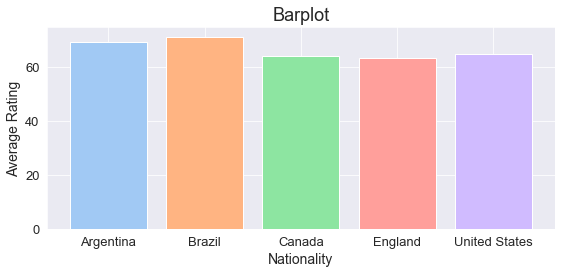

In [24]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(barplot['nationality'], barplot['overall'], color=colors[:5])
plt.xlabel('Nationality')
plt.ylabel('Average Rating')
plt.title('Barplot')
plt.show()

Get only the top 20 players from each country

In [25]:
new_df = pd.concat(
[df_country[df_country['nationality']=='Argentina'][:20], 
 df_country[df_country['nationality']=='Brazil'][:20], 
 df_country[df_country['nationality']=='England'][:20], 
 df_country[df_country['nationality']=='Canada'][:20], 
 df_country[df_country['nationality']=='United States'][:20]]
)

In [26]:
barplot = new_df.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

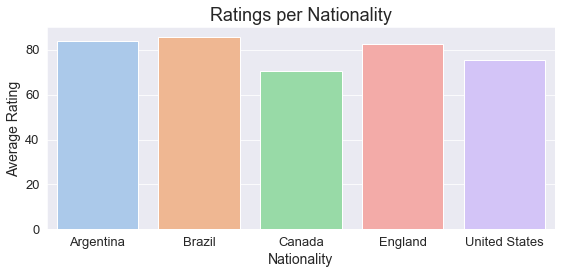

In [27]:
plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['overall'], palette='pastel', ci=None)
ax.set(title='Ratings per Nationality', xlabel='Nationality', ylabel='Average Rating')
plt.show()

The below does not work as 'league_name' does not exist in the current df

In [28]:
# Preprocessing
# barplot = df_country[df_country['league_name'].isin(['Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga'])]
# barplot = barplot.groupby(['nationality', 'league_name'], as_index=False).count()

Text(0, 0.5, 'Count')

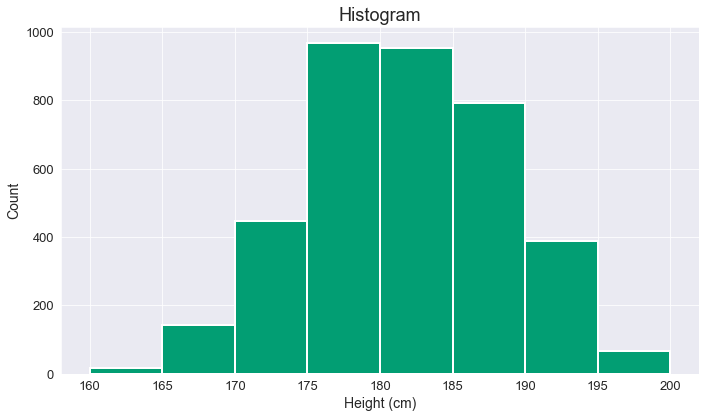

In [29]:
plt.figure(figsize=(10,6), tight_layout=True)
bins = [160, 165, 170, 175, 180, 185, 190, 195, 200]
# matplotlib
plt.hist(df_country['height_cm'], bins=bins, color=sns.color_palette('colorblind')[2], linewidth=2)
plt.title('Histogram')
plt.xlabel('Height (cm)')
plt.ylabel('Count')

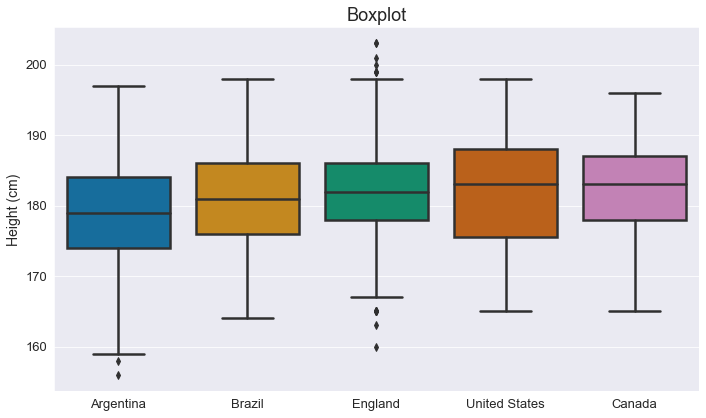

In [30]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.boxplot(data=df_country, x='nationality', y='height_cm', palette='colorblind', linewidth=2.5)
ax.set(title='Boxplot', xlabel='', ylabel='Height (cm)')
plt.show()

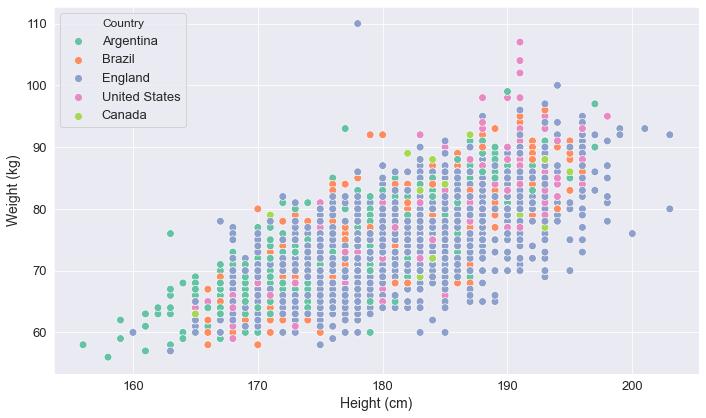

In [31]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df_country, x='height_cm', y='weight_kg',   hue='nationality', palette='Set2', s=60)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12) 
plt.show()

In [32]:
# Preprocessing
piechart = df_fifa21[df_fifa21['club']=='Real Madrid']
piechart = piechart.sort_values('value_eur', ascending=False)[['short_name', 'value_eur']]
piechart = piechart[:11]

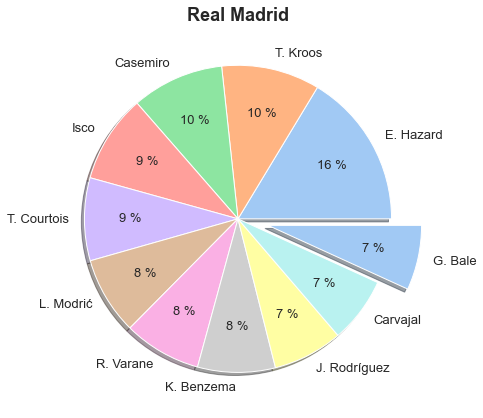

In [33]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 6), tight_layout=True)
explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
plt.pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
plt.title('Real Madrid', weight='bold')
plt.show()

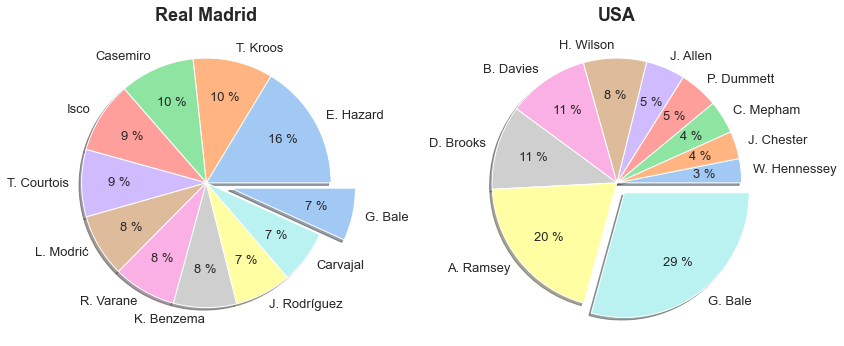

In [34]:
#subplots
fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout=True)

# Preprocessing
piechart2 = df_fifa21[df_fifa21['nationality']=='Wales']
piechart2 = piechart2[:10].sort_values('value_eur')[['short_name', 'value_eur']]

colors = sns.color_palette('pastel')

explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
ax[0].pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[0].set_title('Real Madrid', weight='bold')

explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1]
ax[1].pie(piechart2['value_eur'], labels=piechart2['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[1].set_title('USA', weight='bold')

plt.show()